In [1]:
!apt update && apt install -y libsm6 libxext6
!apt install -y libxrender-dev
!apt install -y git

Hit:1 http://archive.ubuntu.com/ubuntu xenial InRelease
Hit:2 http://security.ubuntu.com/ubuntu xenial-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu xenial-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu xenial-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxrender-dev is already the newest version (1:0.9.9-0ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done

In [2]:
!cd /notebooks/COCO/resnet/keras-retinanet/ && pip install . --user

Processing /notebooks/COCO/resnet/keras-retinanet
  Running setup.py bdist_wheel for keras-retinanet ... done
  Stored in directory: /root/.cache/pip/wheels/81/82/31/546b21ae81f6270e6cb4d5d5ba20b107c23b582bf738dac205
Successfully built keras-retinanet


In [3]:
!pip install --user --upgrade git+https://github.com/broadinstitute/keras-resnet

  Cloning https://github.com/broadinstitute/keras-resnet to /tmp/pip-rcpxylhi-build
Requirement already up-to-date: keras in /root/.local/lib/python3.5/site-packages (from keras-resnet==0.0.8)
Requirement already up-to-date: scipy>=0.14 in /usr/local/lib/python3.5/dist-packages (from keras->keras-resnet==0.0.8)
Requirement already up-to-date: six>=1.9.0 in /usr/local/lib/python3.5/dist-packages (from keras->keras-resnet==0.0.8)
Requirement already up-to-date: pyyaml in /root/.local/lib/python3.5/site-packages (from keras->keras-resnet==0.0.8)
Requirement already up-to-date: numpy>=1.9.1 in /root/.local/lib/python3.5/site-packages (from keras->keras-resnet==0.0.8)
  Found existing installation: keras-resnet 0.0.8
    Uninstalling keras-resnet-0.0.8:
      Successfully uninstalled keras-resnet-0.0.8
  Running setup.py install for keras-resnet ... done


In [4]:
!pip install opencv-python

!pip install keras


In [5]:
import cv2
import keras
import keras_resnet

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# show images inline
%matplotlib inline


# import keras
import keras

# import keras_retinanet
from keras_retinanet.models.resnet import custom_objects
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

In [7]:

# adjust this to point to your downloaded/trained model
model_path = "/notebooks/COCO/resnet50_coco_best_v1.2.2.h5"

# load retinanet model
model = keras.models.load_model(model_path, custom_objects=custom_objects)
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

/root/.local/lib/python3.5/site-packages/keras/models.py:274: UserWarning: Output "non_maximum_suppression_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "non_maximum_suppression_1" during training.
  sample_weight_mode=sample_weight_mode)


processing time:  2.885483741760254


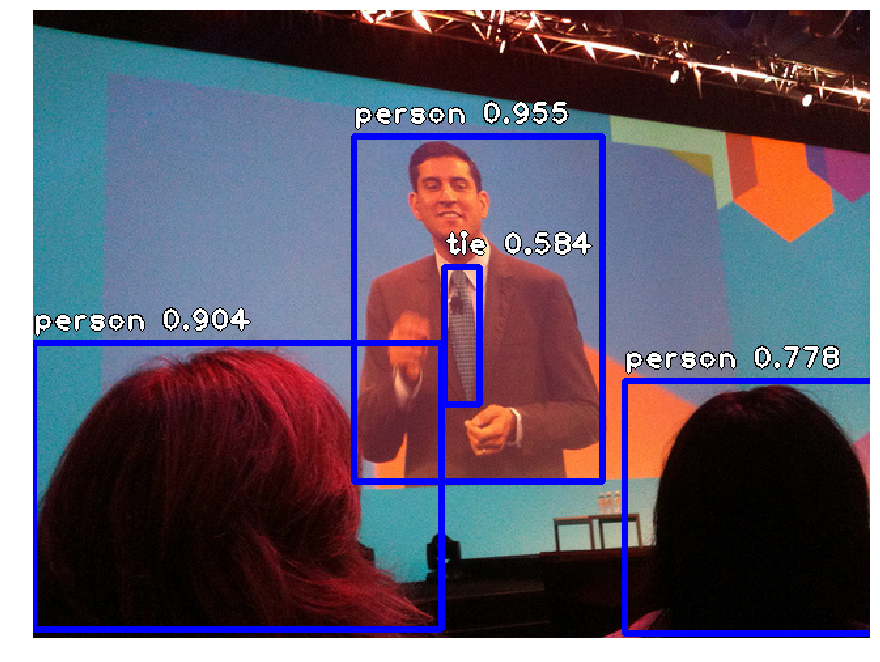

In [8]:
# load image
image = read_image_bgr('/notebooks/COCO/resnet/keras-retinanet/examples/000000008021.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

# correct for image scale
detections[0, :, :4] /= scale

# visualize detections
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.5:
        continue
    b = detections[0, idx, :4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.savefig("out2.png")
plt.show()

processing time:  2.9594802856445312


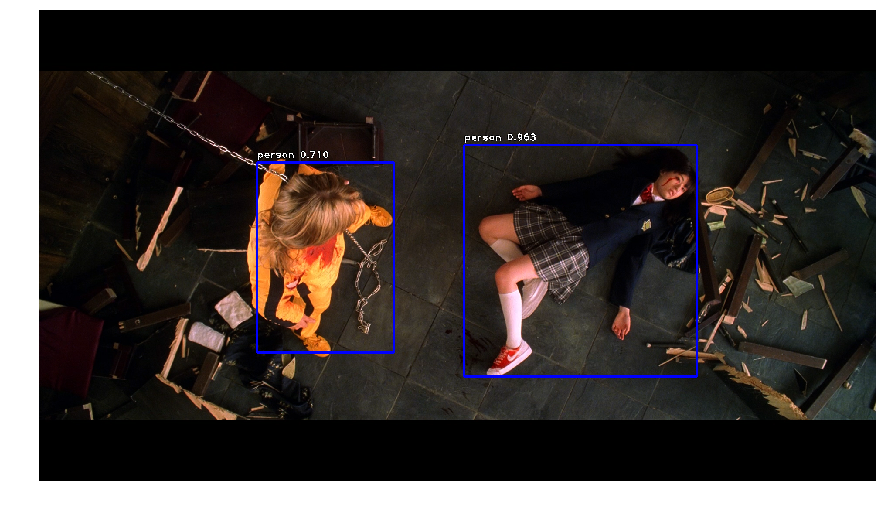

In [9]:
# load image
image = read_image_bgr('/notebooks/COCO/resnet/keras-retinanet/examples/killbill1.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

# correct for image scale
detections[0, :, :4] /= scale

# visualize detections
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.5:
        continue
    b = detections[0, idx, :4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [10]:
!pip install Flask

    100% |################################| 92kB 995kB/s ta 0:00:01
    100% |################################| 71kB 3.2MB/s ta 0:00:011
    100% |################################| 51kB 2.9MB/s ta 0:00:011
  Running setup.py bdist_wheel for itsdangerous ... done
  Stored in directory: /root/.cache/pip/wheels/fc/a8/66/24d655233c757e178d45dea2de22a04c6d92766abfb741129a
Successfully built itsdangerous


In [11]:

from flask import Flask
from pandas.io.json import json_normalize
from flask import Flask, render_template, request, jsonify


from PIL import Image
import random

In [12]:
app = Flask(__name__, static_url_path="/static", static_folder='/notebooks/COCO/static/', template_folder="/notebooks/COCO/templates/")


@app.route('/')
def Welcome():
    return render_template('index.htm')

@app.route('/process_image', methods=['GET', 'POST'])
def process_form_data():
    f = request.files['webcam']
    #img = Image.open(f).convert('LA')


    image = read_image_bgr(f)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    _, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # compute predicted labels and scores
    predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
    scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

    # correct for image scale
    detections[0, :, :4] /= scale

    # visualize detections
    for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
        if score < 0.5:
            continue
        b = detections[0, idx, :4].astype(int)
        cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    
    random_number = ''.join(["%s" % random.randint(0, 9) for num in range(0, 12)])
    plt.savefig("/notebooks/COCO/static/coco/latest_coco_{}.png".format(random_number),bbox_inches='tight', pad_inches=0.1)


    return jsonify( {"image" : "/static/coco/latest_coco_{}.png".format(random_number) } )

In [ ]:
port = os.getenv('VCAP_APP_PORT', '5000')
app.run(host='0.0.0.0', port=int(port))

 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET / HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/default.css HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/Skeleton-2.0.4/css/normalize.css HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/Skeleton-2.0.4/css/skeleton.css HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/particles.js HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/webcam.min.js HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/powerai.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /static/ibm-cloud.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /favicon.ico HTTP/1.1" 404 -
172.17.0.1 - - [21/Feb/2018 13:54:18] "GET /favicon.ico HTTP/1.1" 404 -


processing time:  3.0300850868225098


172.17.0.1 - - [21/Feb/2018 13:54:26] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:26] "GET /static/coco/latest_coco_276100426716.png HTTP/1.1" 200 -


processing time:  3.004815101623535


172.17.0.1 - - [21/Feb/2018 13:54:31] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:31] "GET /static/coco/latest_coco_728230561948.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:36] "POST /process_image HTTP/1.1" 200 -


processing time:  3.0113956928253174


172.17.0.1 - - [21/Feb/2018 13:54:36] "GET /static/coco/latest_coco_208539321427.png HTTP/1.1" 200 -


processing time:  2.975170850753784


172.17.0.1 - - [21/Feb/2018 13:54:41] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:41] "GET /static/coco/latest_coco_763499778176.png HTTP/1.1" 200 -


processing time:  2.9467716217041016


172.17.0.1 - - [21/Feb/2018 13:54:46] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:46] "GET /static/coco/latest_coco_560333906216.png HTTP/1.1" 200 -


processing time:  2.954691171646118


172.17.0.1 - - [21/Feb/2018 13:54:51] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:51] "GET /static/coco/latest_coco_890425787904.png HTTP/1.1" 200 -


processing time:  3.0395264625549316


172.17.0.1 - - [21/Feb/2018 13:54:56] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:54:56] "GET /static/coco/latest_coco_194803013204.png HTTP/1.1" 200 -


processing time:  3.048668146133423


172.17.0.1 - - [21/Feb/2018 13:55:01] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:01] "GET /static/coco/latest_coco_964773881816.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:06] "POST /process_image HTTP/1.1" 200 -


processing time:  2.9530138969421387


172.17.0.1 - - [21/Feb/2018 13:55:06] "GET /static/coco/latest_coco_290428563656.png HTTP/1.1" 200 -


processing time:  2.9485175609588623


172.17.0.1 - - [21/Feb/2018 13:55:11] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:11] "GET /static/coco/latest_coco_494320641882.png HTTP/1.1" 200 -


processing time:  2.9845168590545654


172.17.0.1 - - [21/Feb/2018 13:55:16] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:16] "GET /static/coco/latest_coco_593477543425.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:21] "POST /process_image HTTP/1.1" 200 -


processing time:  2.9717788696289062


172.17.0.1 - - [21/Feb/2018 13:55:21] "GET /static/coco/latest_coco_794203762426.png HTTP/1.1" 200 -


processing time:  3.0931291580200195


172.17.0.1 - - [21/Feb/2018 13:55:26] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:26] "GET /static/coco/latest_coco_581078405541.png HTTP/1.1" 200 -


processing time:  3.032301187515259


172.17.0.1 - - [21/Feb/2018 13:55:31] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:31] "GET /static/coco/latest_coco_267807928836.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:36] "POST /process_image HTTP/1.1" 200 -


processing time:  3.1991207599639893


172.17.0.1 - - [21/Feb/2018 13:55:36] "GET /static/coco/latest_coco_798401404407.png HTTP/1.1" 200 -


processing time:  3.028411388397217


172.17.0.1 - - [21/Feb/2018 13:55:41] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:41] "GET /static/coco/latest_coco_314173657712.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:46] "POST /process_image HTTP/1.1" 200 -


processing time:  3.1304585933685303


172.17.0.1 - - [21/Feb/2018 13:55:46] "GET /static/coco/latest_coco_338996401796.png HTTP/1.1" 200 -


processing time:  3.097221851348877


172.17.0.1 - - [21/Feb/2018 13:55:51] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:51] "GET /static/coco/latest_coco_445734912398.png HTTP/1.1" 200 -


processing time:  3.0627124309539795


172.17.0.1 - - [21/Feb/2018 13:55:56] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:55:56] "GET /static/coco/latest_coco_868583434646.png HTTP/1.1" 200 -


processing time:  3.0707640647888184


172.17.0.1 - - [21/Feb/2018 13:56:01] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:01] "GET /static/coco/latest_coco_218730295048.png HTTP/1.1" 200 -


processing time:  3.1167361736297607


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
172.17.0.1 - - [21/Feb/2018 13:56:06] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:06] "GET /static/coco/latest_coco_199667300505.png HTTP/1.1" 200 -


processing time:  3.1329050064086914


172.17.0.1 - - [21/Feb/2018 13:56:11] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:11] "GET /static/coco/latest_coco_418480605267.png HTTP/1.1" 200 -


processing time:  3.0587334632873535


172.17.0.1 - - [21/Feb/2018 13:56:16] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:16] "GET /static/coco/latest_coco_783656323626.png HTTP/1.1" 200 -


processing time:  3.1036133766174316


172.17.0.1 - - [21/Feb/2018 13:56:21] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:21] "GET /static/coco/latest_coco_167881176679.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:26] "POST /process_image HTTP/1.1" 200 -


processing time:  3.1098709106445312


172.17.0.1 - - [21/Feb/2018 13:56:26] "GET /static/coco/latest_coco_526061763223.png HTTP/1.1" 200 -


processing time:  3.070547103881836


172.17.0.1 - - [21/Feb/2018 13:56:31] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:31] "GET /static/coco/latest_coco_357395482455.png HTTP/1.1" 200 -


processing time:  3.117182731628418


172.17.0.1 - - [21/Feb/2018 13:56:36] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:36] "GET /static/coco/latest_coco_255813506535.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:41] "POST /process_image HTTP/1.1" 200 -


processing time:  3.0825202465057373


172.17.0.1 - - [21/Feb/2018 13:56:41] "GET /static/coco/latest_coco_656135412745.png HTTP/1.1" 200 -


processing time:  3.1109602451324463


172.17.0.1 - - [21/Feb/2018 13:56:46] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:46] "GET /static/coco/latest_coco_809179892617.png HTTP/1.1" 200 -


processing time:  3.1373441219329834


172.17.0.1 - - [21/Feb/2018 13:56:51] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:51] "GET /static/coco/latest_coco_982216377646.png HTTP/1.1" 200 -


processing time:  3.1976428031921387


172.17.0.1 - - [21/Feb/2018 13:56:56] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:56:56] "GET /static/coco/latest_coco_023274987066.png HTTP/1.1" 200 -


processing time:  3.160503387451172


172.17.0.1 - - [21/Feb/2018 13:57:01] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:01] "GET /static/coco/latest_coco_859268461483.png HTTP/1.1" 200 -


processing time:  3.1415646076202393


172.17.0.1 - - [21/Feb/2018 13:57:06] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:06] "GET /static/coco/latest_coco_017542946270.png HTTP/1.1" 200 -


processing time:  3.214454412460327


172.17.0.1 - - [21/Feb/2018 13:57:11] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:11] "GET /static/coco/latest_coco_073196096123.png HTTP/1.1" 200 -


processing time:  3.1943318843841553


172.17.0.1 - - [21/Feb/2018 13:57:16] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:16] "GET /static/coco/latest_coco_512992550506.png HTTP/1.1" 200 -


processing time:  3.211890697479248


172.17.0.1 - - [21/Feb/2018 13:57:21] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:21] "GET /static/coco/latest_coco_633792884025.png HTTP/1.1" 200 -


processing time:  3.231666326522827


172.17.0.1 - - [21/Feb/2018 13:57:26] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:26] "GET /static/coco/latest_coco_524549748817.png HTTP/1.1" 200 -


processing time:  3.3026819229125977


172.17.0.1 - - [21/Feb/2018 13:57:32] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:32] "GET /static/coco/latest_coco_187057215871.png HTTP/1.1" 200 -


processing time:  3.2274551391601562


172.17.0.1 - - [21/Feb/2018 13:57:36] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:36] "GET /static/coco/latest_coco_442475733782.png HTTP/1.1" 200 -


processing time:  3.317058801651001


172.17.0.1 - - [21/Feb/2018 13:57:42] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:42] "GET /static/coco/latest_coco_400310074407.png HTTP/1.1" 200 -


processing time:  3.21995210647583


172.17.0.1 - - [21/Feb/2018 13:57:46] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:46] "GET /static/coco/latest_coco_462519351699.png HTTP/1.1" 200 -


processing time:  4.037099361419678


172.17.0.1 - - [21/Feb/2018 13:57:52] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:52] "GET /static/coco/latest_coco_290434680513.png HTTP/1.1" 200 -


processing time:  3.249126672744751


172.17.0.1 - - [21/Feb/2018 13:57:56] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:57:56] "GET /static/coco/latest_coco_647798139492.png HTTP/1.1" 200 -


processing time:  3.258162260055542


172.17.0.1 - - [21/Feb/2018 13:58:01] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:01] "GET /static/coco/latest_coco_437704572439.png HTTP/1.1" 200 -


processing time:  3.2379133701324463


172.17.0.1 - - [21/Feb/2018 13:58:07] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:07] "GET /static/coco/latest_coco_011209258518.png HTTP/1.1" 200 -


processing time:  3.2735393047332764


172.17.0.1 - - [21/Feb/2018 13:58:11] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:12] "GET /static/coco/latest_coco_203816853971.png HTTP/1.1" 200 -


processing time:  3.21136474609375


172.17.0.1 - - [21/Feb/2018 13:58:16] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:16] "GET /static/coco/latest_coco_333755975826.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:21] "POST /process_image HTTP/1.1" 200 -


processing time:  3.0848920345306396


172.17.0.1 - - [21/Feb/2018 13:58:21] "GET /static/coco/latest_coco_085968328341.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:26] "POST /process_image HTTP/1.1" 200 -


processing time:  2.7273190021514893


172.17.0.1 - - [21/Feb/2018 13:58:26] "GET /static/coco/latest_coco_161348841377.png HTTP/1.1" 200 -


----------------------------------------
Exception happened during processing of request from ('172.17.0.1', 49652)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.5/socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.5/socketserver.py", line 681, in __init__
    self.handle()
  File "/usr/local/lib/python3.5/dist-packages/werkzeug/serving.py", line 293, in handle
    rv = BaseHTTPRequestHandler.handle(self)
  File "/usr/lib/python3.5/http/server.py", line 422, in handle
    self.handle_one_request()
  File "/usr/local/lib/python3.5/dist-packages/werkzeug/serving.py", line 328, in handle_one_request
    return self.run_wsgi()
  File "/usr/local/lib/python3.5/dist-packages/werkzeug/serving.py", line 270, in run_wsgi
    execute(self.server.app)
  File "/usr/loc

processing time:  2.690485954284668


172.17.0.1 - - [21/Feb/2018 13:58:34] "POST /process_image HTTP/1.1" 200 -


processing time:  2.7636682987213135


172.17.0.1 - - [21/Feb/2018 13:58:37] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:37] "GET /static/coco/latest_coco_757842811477.png HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:37] "GET /static/coco/latest_coco_390395959969.png HTTP/1.1" 200 -


processing time:  2.6397438049316406


172.17.0.1 - - [21/Feb/2018 13:58:41] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:41] "GET /static/coco/latest_coco_029702879424.png HTTP/1.1" 200 -


processing time:  2.624854326248169


172.17.0.1 - - [21/Feb/2018 13:58:46] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:46] "GET /static/coco/latest_coco_627882751867.png HTTP/1.1" 200 -


processing time:  2.5836689472198486


172.17.0.1 - - [21/Feb/2018 13:58:51] "POST /process_image HTTP/1.1" 200 -
172.17.0.1 - - [21/Feb/2018 13:58:51] "GET /static/coco/latest_coco_462087296353.png HTTP/1.1" 200 -


In [ ]:
8 * 8